## **Practical No: 1**

## **AIM:** Build a machine learning model for house price prediction analysis using lasso and ridge.

### **CODE and OUTPUT**

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import load_boston

In [2]:
feature_num = 7
boston = load_boston()
X = boston.data[:, :feature_num]
y = boston.target
features = boston.feature_names[:feature_num]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
pd.DataFrame(X, columns = features).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2


In [4]:
def test(models,  iterations = 1000):
  results = {}
  for i in models:
    r2_train = []
    r2_test = []
    for j in range(iterations):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
      r2_test.append(metrics.r2_score(y_test, models[i].fit(X_train, 
                                              y_train).predict(X_test)))
      r2_train.append(metrics.r2_score(y_train, models[i].fit(X_train, 
                                               y_train).predict(X_train)))
      results[i] = [np.mean(r2_train), np.mean(r2_test)]
  return pd.DataFrame(results)

In [5]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}

In [6]:
test(models)

,OLS,Lasso,Ridge
0,0.590711,0.545363,0.590701
1,0.566986,0.524932,0.567650


## **Practical No: 3**

## **AIM:** Compare the differences between the accuracies obtained using ridge and lasso regression in first experiment.

### **CODE and OUTPUT**

In [7]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

models2 = {'OLS': linear_model.LinearRegression(),
           'Lasso': GridSearchCV(linear_model.Lasso(), 
                               param_grid=lasso_params).fit(X,y).best_estimator_,
           'Ridge': GridSearchCV(linear_model.Ridge(), 
                               param_grid=ridge_params).fit(X,y).best_estimator_,}

In [8]:
test(models2)

,OLS,Lasso,Ridge
0,0.592035,0.589842,0.494903
1,0.562802,0.567170,0.474249


In [9]:
lasso_params = {'fit__alpha':[0.005, 0.02, 0.03, 0.05, 0.06]}
ridge_params = {'fit__alpha':[0.001,0.01,0.1,1,10,100,200,250,550, 580, 600, 620, 650]}

pipe1 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.LinearRegression())])
pipe2 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Lasso(max_iter=1000,tol=0.001))])
pipe3 = Pipeline([('poly', PolynomialFeatures()),
                 ('fit', linear_model.Ridge(max_iter=1000,tol=0.001))])

models3 = {'OLS': pipe1,
           'Lasso': GridSearchCV(pipe2, 
                                 param_grid=lasso_params).fit(X,y).best_estimator_ ,
           'Ridge': GridSearchCV(pipe3, 
                                 param_grid=ridge_params).fit(X,y).best_estimator_,}

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.735e+03, tolerance: 3.919e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.493e+03, tolerance: 3.307e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [10]:
test(models3)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.806e+03, tolerance: 3.387e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.806e+03, tolerance: 3.387e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

,OLS,Lasso,Ridge
0,0.716673,0.760056,0.721142
1,0.575191,0.669423,0.665665


<html>
<table>
  <tr>
    <th> </th>
    <th>OLS</th>
    <th>Lasso</th>
    <th>Ridge</th>
  </tr>
  <tr>
    <td>0</td>
    <td>0.570580</td>
    <td>0.758575</td>
    <td>0.720604</td>
  </tr>
  <tr>
    <td>1</td>
    <td>0.188981</td>
    <td>0.675732</td>
    <td>0.666624</td>
  </tr>
</table>
</html>


## **Practical No: 4**

## **AIM:** For the above build regression model, perform model evaluation, feature selection and parameter tuning

### **CODE and OUTPUT**

In [11]:
# Experiment-4:On the Housing DataSet

In [12]:
pd.DataFrame(X, columns = features).tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8


In [13]:
train_dataset = pd.DataFrame(X, columns = features).sample(frac=0.8, random_state=0)
test_dataset = pd.DataFrame(X, columns = features).drop(train_dataset.index)

In [14]:
train_dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4


In [15]:
test_dataset.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4


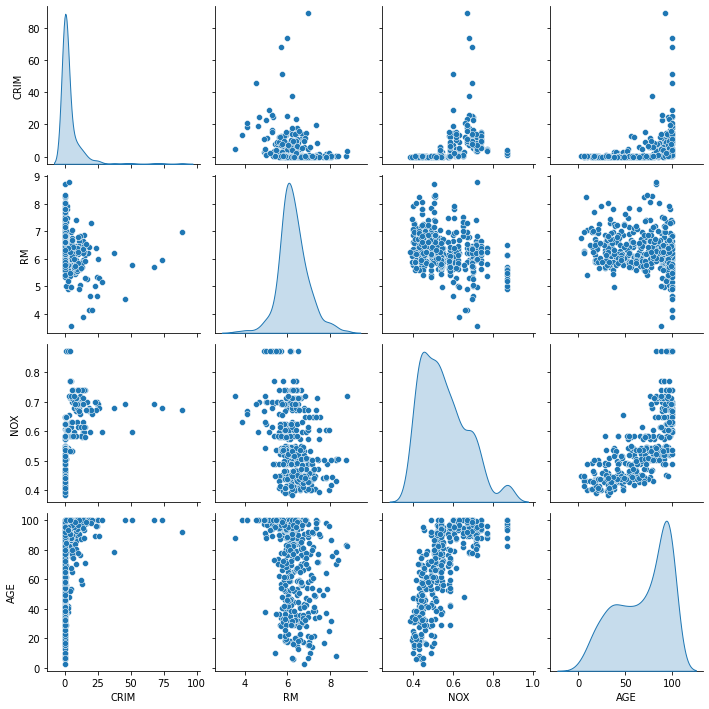

In [16]:
import seaborn as sns
sns.pairplot(train_dataset[['CRIM', 'RM', 'NOX', 'AGE']], diag_kind='kde') #kernel density estimate

In [17]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,405.0,3.670339,8.977954,0.00632,0.08265,0.26838,3.47428,88.9762
ZN,405.0,11.067901,22.688396,0.00000,0.00000,0.00000,12.50000,95.0000
INDUS,405.0,11.097951,6.699157,0.74000,5.32000,9.69000,18.10000,27.7400
CHAS,405.0,0.069136,0.253999,0.00000,0.00000,0.00000,0.00000,1.0000
NOX,405.0,0.553098,0.115564,0.38500,0.44900,0.53800,0.62400,0.8710
RM,405.0,6.269768,0.690552,3.56100,5.87800,6.19300,6.61900,8.7800
AGE,405.0,68.241975,27.908527,2.90000,45.00000,76.50000,94.10000,100.0000


In [18]:
#Split features from labels
#Separate the target value—the "label"—from the features. 
#This label is the value that you will train the model to predict

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('CRIM')
test_labels = test_features.pop('CRIM')

In [19]:
#Normalization
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
CRIM,3.670339,8.977954
ZN,11.067901,22.688396
INDUS,11.097951,6.699157
CHAS,0.069136,0.253999
NOX,0.553098,0.115564
RM,6.269768,0.690552
AGE,68.241975,27.908527


In [20]:
import tensorflow as tf
normalizer = tf.keras.layers.Normalization(axis=-1)

In [21]:
normalizer.adapt(np.array(train_features))

In [22]:
print(normalizer.mean.numpy())

[[11.067901  11.097952   0.0691358  0.5530978  6.2697673 68.24197  ]]


In [23]:
#When the layer is called, it returns the input data, with each 
#feature independently normalized:

In [24]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 0.    3.24  0.    0.46  6.33 17.2 ]]

Normalized: [[-0.49 -1.17 -0.27 -0.81  0.09 -1.83]]


In [25]:
from tensorflow import keras
from tensorflow.keras import layers
RM = np.array(train_features['RM'])

RM_normalizer = layers.Normalization(input_shape=[1,], axis=None)
RM_normalizer.adapt(RM)

In [26]:
RM_model = tf.keras.Sequential([
    RM_normalizer,
    layers.Dense(units=1)
])

In [27]:
RM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [28]:
#This model will predict 'CRIM'-CRIM - per capita crime rate by town 
# from 'RM'-RM - average number of rooms per dwelling.
#Run the untrained model on the first 10 'RM' values. The output won't be good, 
#but notice that it has the expected shape of (10, 1):

In [29]:
RM_model.predict(RM[:10])

1/1 [==============================] - 0s 158ms/step


array([[-0.08419282],
       [ 0.07158951],
       [-0.13745163],
       [ 1.2259756 ],
       [ 0.05028624],
       [ 0.5802117 ],
       [ 0.48567703],
       [ 0.4017947 ],
       [ 1.726609  ],
       [-0.18005882]], dtype=float32)

In [30]:
RM_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [31]:
%%time
history = RM_model.fit(
    train_features['RM'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.52 s, sys: 291 ms, total: 5.81 s
Wall time: 10.9 s


In [32]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.373192,4.316287,95
96,3.375711,4.329482,96
97,3.380123,4.304395,97
98,3.374063,4.311584,98
99,3.373501,4.317360,99


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [CRIM]')
  plt.legend()
  plt.grid(True)

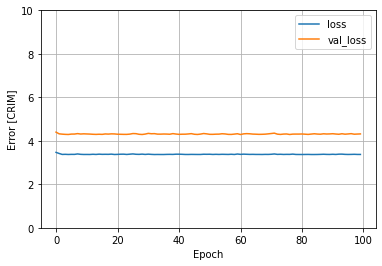

In [34]:
plot_loss(history)

In [35]:
test_results = {}   # collect result on test set

In [36]:
test_results['RM_model'] = RM_model.evaluate(
    test_features['RM'],
    test_labels, verbose=0)

In [37]:
x = tf.linspace(0.0, 250, 251)
y = RM_model.predict(x)

8/8 [==============================] - 0s 3ms/step


In [38]:
def plot_RM(x, y):
  plt.scatter(train_features['RM'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('RM')
  plt.ylabel('CRIM')
  plt.legend()

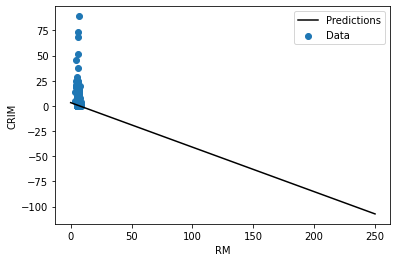

In [39]:
plot_RM(x, y)

In [40]:
#Linear Regression with multiple inputs
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [41]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 69ms/step


array([[-1.1581209 ],
       [-0.23814511],
       [ 1.6559641 ],
       [ 0.36927956],
       [-0.35107547],
       [-0.19724384],
       [-0.67013025],
       [-0.1651468 ],
       [ 0.2997812 ],
       [-0.15597272]], dtype=float32)

In [42]:
#When you call the model, its weight matrices will be built—check that the 
#kernel weights (the in) have a shape of (9, 1):

linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [43]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 5.28 s, sys: 302 ms, total: 5.59 s
Wall time: 5.66 s


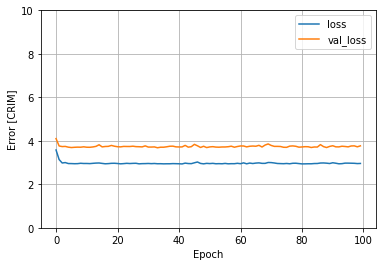

In [44]:
plot_loss(history)

In [45]:
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

In [46]:
test_results

{'RM_model': 3.3348498344421387, 'linear_model': 2.777076005935669}